In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [9]:
df = pd.read_csv('HomeC.csv')
df.head(5)


/tmp/ipykernel_6262/3762690608.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HomeC.csv')


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [10]:
#print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [11]:
df['time'].head()
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0]))))
time_index = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min')
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)
df.iloc[np.r_[0:5,-5:0]].iloc[:,0]
df.head(5)



 start  2016-01-01 06:00:00


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


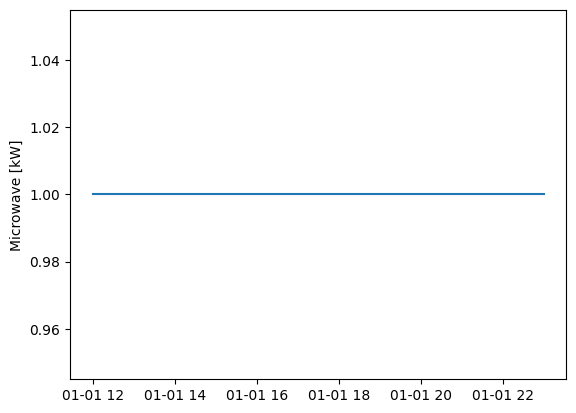

In [22]:



def presence_check (data_frame, attribute, time_span):

    

    df_presence[attribute] = np.where(df_presence[attribute] > 0, 1, df_presence[attribute])
    df_presence.dropna(inplace=True)

    star_index_date = df_presence.index.get_loc(time_span[0])
    end_index_date = df_presence.index.get_loc(time_span[1])

    sns.lineplot(x = df_presence.index[star_index_date: end_index_date], y = attribute[0], data = df_presence[star_index_date:end_index_date])


df_presence = df['Microwave [kW]'].copy(deep = True)  
presence_check(df_presence, ['Microwave [kW]'],['2016-01-01 12:00:00', '2016-01-01 23:00:00'])

In [13]:
def set_default(hour_span, data_frame):
    


SyntaxError: incomplete input (3915557119.py, line 2)

In [ ]:
t = [(5,4),(7,8),(11,45)]
print(t[0][0])

5


"\ndf['use [kW]'] = pd.to_numeric(df['use [kW]'],errors = 'coerce')\ndf['Fridge [kW]'] = pd.to_numeric(df['Fridge [kW]'],errors = 'coerce')\ndf['Furnace 1 [kW]'] = pd.to_numeric(df['Furnace 1 [kW]'],errors = 'coerce')\ndf['Furnace 2 [kW]'] = pd.to_numeric(df['Furnace 2 [kW]'],errors = 'coerce')\n#print(df.dtypes)\nsns.kdeplot(data  =  df['use [kW]'][0:100])\nsns.kdeplot(data  =  df['Fridge [kW]'][0:100])\nsns.kdeplot(data  =  df['Furnace 2 [kW]'][0:100])\n\n"

In [ ]:
# Pair plot
df

#sns.pairplot(df[0:15],hue = 'time', palette='Blue')

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:26:00,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
2016-12-16 03:27:00,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
2016-12-16 03:28:00,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
2016-12-16 03:29:00,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [ ]:
np.r_[0:5,-5:0].shape


(10,)